## Initialization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor

In [3]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

In [4]:
mses = {'LinReg' : 0, 'SVR': 0, 'DTR':0, 'RFR':0, 'KNNR':0}
r2s = {'LinReg' : 0, 'SVR': 0, 'DTR':0, 'RFR':0, 'KNNR':0}

## Importing the Data

In [5]:
dataset = pd.read_csv('yacht_hydrodynamics.data', delimiter = r'\s+', header = None)
dataset.shape

(308, 7)

In [6]:
dataset.head()

,0,1,2,3,4,5,6
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18


## Create X and Y

In [7]:
X = dataset.iloc[:, 0:6].values
Y = dataset.iloc[:, 6].values

In [8]:
X.shape

(308, 6)

In [9]:
Y.shape

(308,)

In [10]:
X

array([[-2.3  ,  0.568,  4.78 ,  3.99 ,  3.17 ,  0.125],
       [-2.3  ,  0.568,  4.78 ,  3.99 ,  3.17 ,  0.15 ],
       [-2.3  ,  0.568,  4.78 ,  3.99 ,  3.17 ,  0.175],
       ..., 
       [-2.3  ,  0.6  ,  4.34 ,  4.23 ,  2.73 ,  0.4  ],
       [-2.3  ,  0.6  ,  4.34 ,  4.23 ,  2.73 ,  0.425],
       [-2.3  ,  0.6  ,  4.34 ,  4.23 ,  2.73 ,  0.45 ]])

In [11]:
Y

array([  1.10000000e-01,   2.70000000e-01,   4.70000000e-01,
         7.80000000e-01,   1.18000000e+00,   1.82000000e+00,
         2.61000000e+00,   3.76000000e+00,   4.99000000e+00,
         7.16000000e+00,   1.19300000e+01,   2.01100000e+01,
         3.27500000e+01,   4.94900000e+01,   4.00000000e-02,
         1.70000000e-01,   3.70000000e-01,   6.60000000e-01,
         1.06000000e+00,   1.59000000e+00,   2.33000000e+00,
         3.29000000e+00,   4.61000000e+00,   7.11000000e+00,
         1.19900000e+01,   2.10900000e+01,   3.50100000e+01,
         5.18000000e+01,   9.00000000e-02,   2.90000000e-01,
         5.60000000e-01,   8.60000000e-01,   1.31000000e+00,
         1.99000000e+00,   2.94000000e+00,   4.21000000e+00,
         5.54000000e+00,   8.25000000e+00,   1.30800000e+01,
         2.14000000e+01,   3.31400000e+01,   5.01400000e+01,
         2.00000000e-01,   3.50000000e-01,   6.50000000e-01,
         9.30000000e-01,   1.37000000e+00,   1.97000000e+00,
         2.83000000e+00,

## Preprocess the Data

In [13]:
sc_X = StandardScaler()

In [14]:
X = sc_X.fit_transform(X)

In [15]:
X

array([[ 0.05415696,  0.16616243, -0.03418367,  0.09717082, -0.14870298,
        -1.61245155],
       [ 0.05415696,  0.16616243, -0.03418367,  0.09717082, -0.14870298,
        -1.36438208],
       [ 0.05415696,  0.16616243, -0.03418367,  0.09717082, -0.14870298,
        -1.11631261],
       ..., 
       [ 0.05415696,  1.5423783 , -1.7757515 ,  0.53568528, -1.92579533,
         1.11631261],
       [ 0.05415696,  1.5423783 , -1.7757515 ,  0.53568528, -1.92579533,
         1.36438208],
       [ 0.05415696,  1.5423783 , -1.7757515 ,  0.53568528, -1.92579533,
         1.61245155]])

## Create Train and Test Data

In [16]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [17]:
X_train.shape

(246, 6)

In [18]:
X_test.shape

(62, 6)

In [19]:
Y_train.shape

(246,)

In [20]:
Y_test.shape

(62,)

## Linear Regression

In [21]:
reg_lin = LinearRegression()

In [22]:
reg_lin.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
Y_pred_lin = reg_lin.predict(X_test)

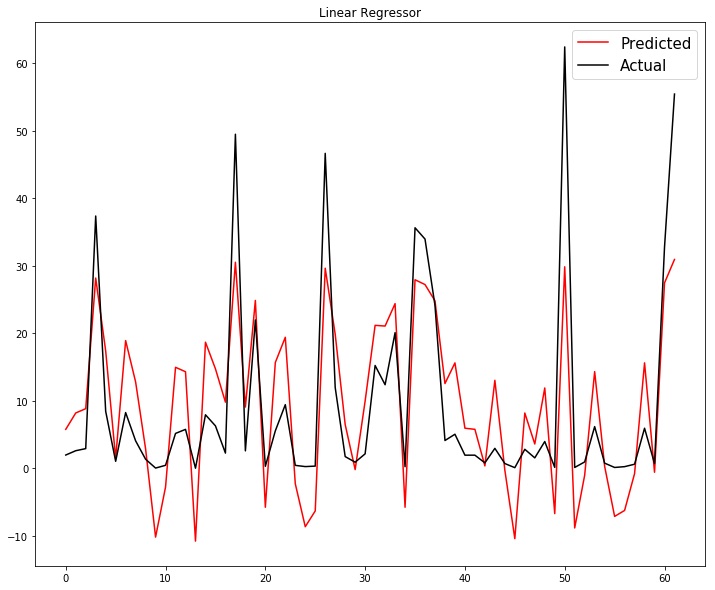

In [25]:
plt.figure(figsize = (12,10))
plt.plot(Y_pred_lin, ms = 50, alpha = 1, color = 'red')
plt.plot(Y_test, ms = 50, alpha = 1, color = 'black')
plt.legend(['Predicted', 'Actual'], fontsize = '15')
plt.title('Linear Regressor')
plt.show()

## SVR

In [26]:
reg_lsvr = SVR(kernel = 'linear')

In [27]:
reg_lsvr.fit(X_train, Y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='linear', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [28]:
Y_pred_lsvr = reg_lsvr.predict(X_test)

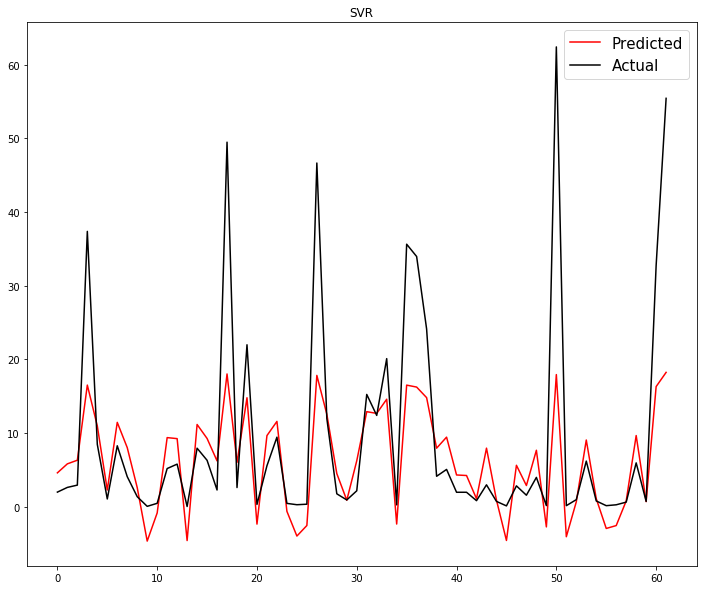

In [29]:
plt.figure(figsize = (12,10))
plt.plot(Y_pred_lsvr, ms = 50, alpha = 1, color = 'red')
plt.plot(Y_test, ms = 50, alpha = 1, color = 'black')
plt.legend(['Predicted', 'Actual'], fontsize = '15')
plt.title('SVR')
plt.show()

## Decision Tree Regressor

In [30]:
reg_dtr = DecisionTreeRegressor()

In [31]:
reg_dtr.fit(X_train, Y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [32]:
Y_pred_dtr = reg_dtr.predict(X_test)

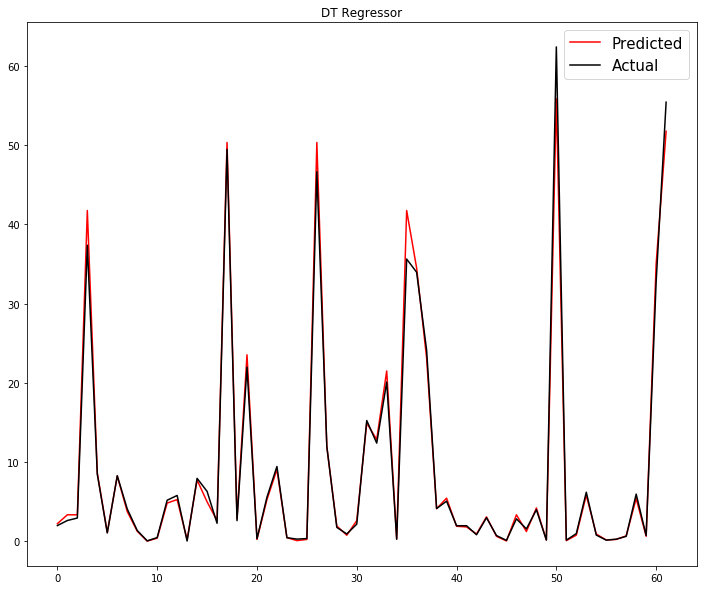

In [33]:
plt.figure(figsize = (12,10))
plt.plot(Y_pred_dtr, ms = 50, alpha = 1, color = 'red')
plt.plot(Y_test, ms = 50, alpha = 1, color = 'black')
plt.legend(['Predicted', 'Actual'], fontsize = '15')
plt.title('DT Regressor')
plt.show()

## Random Forest Regressor

In [34]:
reg_rfr = RandomForestRegressor(n_estimators=200)

In [35]:
reg_rfr.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [36]:
Y_pred_rfr = reg_rfr.predict(X_test)

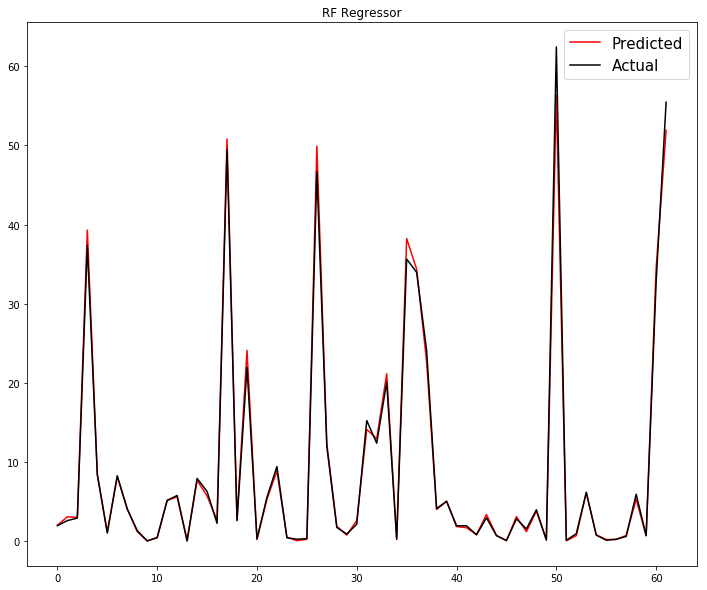

In [37]:
plt.figure(figsize = (12,10))
plt.plot(Y_pred_rfr, ms = 50, alpha = 1, color = 'red')
plt.plot(Y_test, ms = 50, alpha = 1, color = 'black')
plt.legend(['Predicted', 'Actual'], fontsize = '15')
plt.title('RF Regressor')
plt.show()

## KNN Regressor

In [38]:
reg_knnr = KNeighborsRegressor(n_neighbors = 2)

In [39]:
reg_knnr.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=2, p=2,
          weights='uniform')

In [40]:
Y_pred_knnr = reg_knnr.predict(X_test)

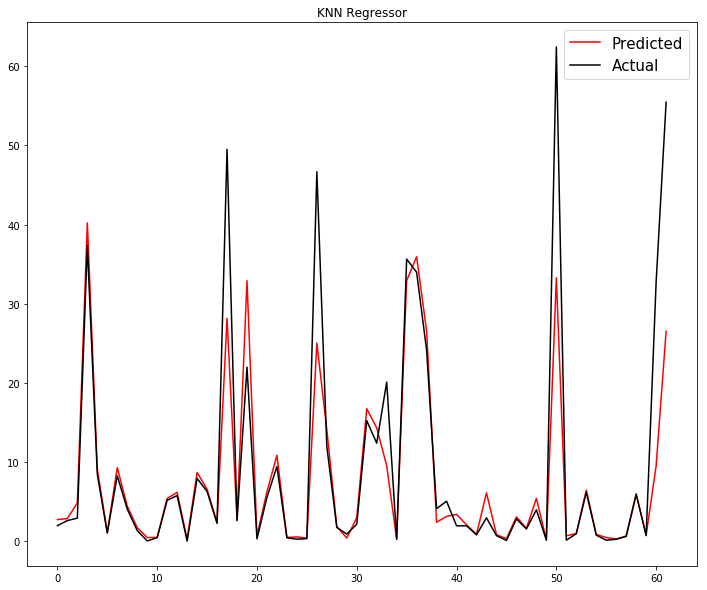

In [41]:
plt.figure(figsize = (12,10))
plt.plot(Y_pred_knnr, ms = 50, alpha = 1, color = 'red')
plt.plot(Y_test, ms = 50, alpha = 1, color = 'black')
plt.legend(['Predicted', 'Actual'], fontsize = '15')
plt.title('KNN Regressor')
plt.show()

## Metrics

In [42]:
mses['LinReg'] = mean_squared_error(Y_pred_lin, Y_test)
mses['SVR'] = mean_squared_error(Y_pred_lsvr, Y_test)
mses['DTR'] = mean_squared_error(Y_pred_dtr, Y_test)
mses['RFR'] = mean_squared_error(Y_pred_rfr, Y_test)
mses['KNNR'] = mean_squared_error(Y_pred_knnr, Y_test)
mses

{'DTR': 2.3179887096774205,
 'KNNR': 55.58887217741934,
 'LinReg': 83.319904486146669,
 'RFR': 1.4170680029032614,
 'SVR': 116.03894386902337}

In [43]:
r2s['LinReg'] = r2_score(Y_pred_lin, Y_test)
r2s['SVR'] = r2_score(Y_pred_lsvr, Y_test)
r2s['DTR'] = r2_score(Y_pred_dtr, Y_test)
r2s['RFR'] = r2_score(Y_pred_rfr, Y_test)
r2s['KNNR'] = r2_score(Y_pred_knnr, Y_test)
r2s

{'DTR': 0.9895947163881923,
 'KNNR': 0.49656206696666805,
 'LinReg': 0.43994012372263147,
 'RFR': 0.99346612762466613,
 'SVR': -1.501724580909872}